# Stock Market Prediction

# Team members:

1. Kai Ching Suen
2. Kaito Kumagia
3. Manan Duggle
4. Unais Ibarahim

# Project goals:

this project is to test a data source (signal, second column in data.csv) which claims to be predictive of future returns of the SP500 index (spy_close_price, third column in data.csv).

# Steps:

  1. data cleaning (Kaito Kumagai)
  2. analysis and visualizations(graphs and juypter) (Kai Ching)
  3. summary (Manan Duggle and Unais Ibarahim)

In [1]:
"""
Set up all module path
"""
import os
import sys
root_path = os.path.abspath(os.path.join('..'))
if root_path not in sys.path:
    sys.path.append(root_path)
feature_path = os.path.join(root_path, 'src', 'features')
vizualizer_path = os.path.join(root_path, 'src', 'visualization')
models_path = os.path.join(root_path, 'src', 'models', 'Kai')
raw_data_path = os.path.join(root_path, 'data', 'raw')
processed_data_path = os.path.join(root_path, 'data', 'processed')

sys.path.extend([feature_path, vizualizer_path, models_path, raw_data_path, processed_data_path])

In [2]:
from feature_builder import get_raw_data, raw_data_processor
from train_controller import train_controller
from prediction_controller import prediction_controller
from netural_network import netural_network
from simple_regression import simple_regression
from vizualizer import visualizeSimpleLinearRegreesionResult, displayRegressionReport

Using TensorFlow backend.


# Explanation:
Here we get read the csv file provided. The first column is date(YYYYMMDD), then signal and spy_close_price.

In [3]:
df = get_raw_data()
df.head(10)

MESSAGE: Loaded data from /Users/aaronsuen/Desktop/SBU/CSE391/Stock_Prediction/data/raw/data.csv
SUCCESS: DataFrame Generated


,date,signal,spy_close_price
0,20120103,3.107767,127.495
1,20120104,3.107282,127.700
2,20120105,3.099757,128.040
3,20120106,3.134223,127.710
4,20120109,3.135922,128.020
5,20120110,3.143447,129.130
6,20120111,3.127184,129.200
7,20120112,3.139320,129.510
8,20120113,3.174029,128.840
9,20120117,3.190777,129.340


# Explanation:
1. We convert the string datetime to numeric datatype, timestamp.
2. Then, we fill all na with the mean.
3. We clean out all outliers by excluding the row of data.

In [4]:
df, excluded_data = raw_data_processor(df)
df

MESSAGE: DATA CLEANING started
MESSAGE: data row before cleaning: 667
MESSAGE: data row before cleaning: 658
SUCCESS: DATA is CLEAN
SUCCESS: CSV  data.csv  Generated
SUCCESS: processed data file Generated


,date,signal,spy_close_price
0,1.325549e+09,3.107767,127.495
1,1.325635e+09,3.107282,127.700
2,1.325722e+09,3.099757,128.040
3,1.325808e+09,3.134223,127.710
4,1.326067e+09,3.135922,128.020
5,1.326154e+09,3.143447,129.130
6,1.326240e+09,3.127184,129.200
7,1.326326e+09,3.139320,129.510
8,1.326413e+09,3.174029,128.840
9,1.326758e+09,3.190777,129.340


# Explanation:
Here list all protential error in our data

In [5]:
excluded_data

,date,signal,spy_close_price
303,1.364256e+09,-3.802670,156.1900
421,1.378944e+09,4.193204,618.9500
422,1.379030e+09,4.143689,619.3300
423,1.379290e+09,4.124515,710.3100
459,1.383610e+09,429.514563,176.2700
460,1.383696e+09,432.961165,177.1700
570,1.397434e+09,0.004560,182.9401
571,1.397520e+09,0.454976,184.2000
572,1.397606e+09,0.455898,186.1250


# Explanation
Our analysis approach is using regression.

Reason: 
- We only have basically one input(Signal) and one output(Price), using simple regression is easier in that case.

We attempted using rnn as well but it didn't work well.

Here we predict with simple regression.

In [6]:
trainController = train_controller(df)
data_set = trainController.get_processed_data_set()
predictionController = prediction_controller(data_set)

"""
predict_with_simple_regression
"""
predictionController.predict_with_simple_regression()
result = predictionController.get_result()
X_train = result["simple_regression"]["x_train"]
X_test = result["simple_regression"]["x_test"]
Y_train = result["simple_regression"]["y_train"]
Y_test = result["simple_regression"]["y_test"]
Y_pred_train = result["simple_regression"]["y_pred_train"]
Y_pred_test = result["simple_regression"]["y_pred_test"]

MESSAGE: Initializing training and test data...
SUCCESS: Initialized training and test data
MESSAGE: Predicting with simple regression
SUCCESS: Result predcited with regression is generated.


# Explanation
This is the visualization of our training set data.
1. X train: Price
2. Y train: Signal

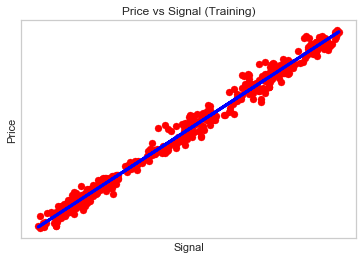

In [7]:
visualizeSimpleLinearRegreesionResult(X_train, Y_train, Y_pred_train,
    "Signal", "Price", "Price vs Signal (Training)") #visualizing training result

# Explanation
This is the visualization of our training set data.
1. X test: Signal
2. Y test: Price

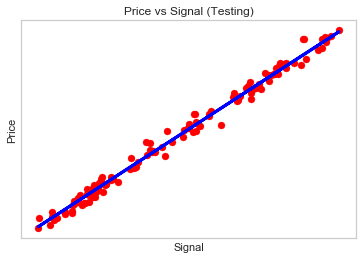

In [8]:
visualizeSimpleLinearRegreesionResult(X_test, Y_test, Y_pred_test,
    "Signal", "Price", "Price vs Signal (Testing)") #visualizing test result

# Explanation
This is the report of our testing set data and a residuals visualization.

coefficients:  [[40.61966788]]
intercept:  [1.89742821]
mean squared error:  3.723518903607173
r-squared:  0.9914695345179563
residuals: 
                0
count  132.000000
mean     0.120742
std      1.933198
min     -5.943696
25%     -1.000618
50%      0.004474
75%      1.151437
max      5.747173


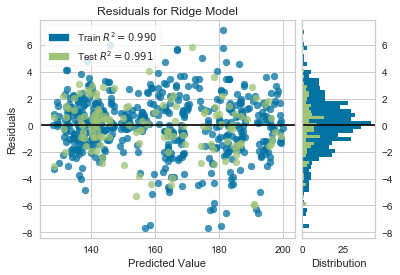

In [9]:
displayRegressionReport(result["simple_regression"])

# R-squared
The result of R-squard is 0.9915 in our regression model. 

R-squared (R^2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. 

The higher R^2 is, then the greater portion of observed variation can be explained by the model's inputs. In our case, nearly 100% of our observed variation(Signal), the movement of it, can be explained by the model's input (Price) .

# Mean Squared Error
The result of Mean Squared Error is 3.724 in our regression model. 
It supposes to show the distance between our predicted and test values. 

However, the mean Squared Error of our result is really small. It means the predicted result
for signal is almost as same as the test values. 

3.724 means that the difference between predicted values and actual values are averagely 3.8

# Coefficient and Intercept
The coefficient value is 40.62 which means the mean of the dependent variable, price, have a 40.62 positive shift in the independent variable, signal.

y=a+bx where a is our Intercept and b is our Coefficient. 

In our cases, y = 1.89742821 + 40.61966788x, 
a unit increase in x(Singal) results in an increase in average y(Price) by rougly 41 units.

# Data Cleaning Report in details

In [10]:
#Error
excluded_data

,date,signal,spy_close_price
303,1.364256e+09,-3.802670,156.1900
421,1.378944e+09,4.193204,618.9500
422,1.379030e+09,4.143689,619.3300
423,1.379290e+09,4.124515,710.3100
459,1.383610e+09,429.514563,176.2700
460,1.383696e+09,432.961165,177.1700
570,1.397434e+09,0.004560,182.9401
571,1.397520e+09,0.454976,184.2000
572,1.397606e+09,0.455898,186.1250


Data like 459, 460 have a really huge signal and 421, 422 and 423 have an extreme
price so they could be potentially error data.

Approach to Errors:
    For all nan data, we filled them with means, however for any data that lies
    outside of the IQR margin, we simply excluded the entire row since we can't
    be sure about how much the potential error could affect our calculation.

      1) extreme data: eliminate outliers
      2) missing data: fill with means
      3) categorial variables: date is categorial so it was converted

In [11]:
import pandas as pd
#Method to locate outliers (potential errors):
"""
Detect and remove outliers
@return: pandas.core.frame.DataFrame
"""
def clean_outliner(df: pd.DataFrame) -> pd.DataFrame:
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    excluded_data = df[((df <= (Q1 - 1.5 * IQR)) |(df >= (Q3 + 1.5 * IQR))).any(axis=1)]
    df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df, excluded_data

Processes in details:
 
    1. Read raw data
      use read_csv from custom_func to read data in csv file
        ~ use read_csv function from pandas to read data and check if succeeded
        
    2. Restructure data
      ~ use to_date from custom_func to turn int date data  (format of YYYYMMDD) into datetime objects
      ~ save timestamp as date
      
    3. Clean data
    There are 2 types of data we need to identify and handle in order to conduct the appropriate regression analysis: null data and outlier. Null data will affect means and other statics as error. outlier will affect the value of statics and make it harder to find the true patter of data.
          Filled null data with mean. Because stock data is time series, it is important to have Data for all the time in order to find the pattern of the data and predict future value. However, since it is also important to omit outliers so that regression would not be overly affected by a few outliers. To do this, calculate Q1 and Q3 to find IQR and omit data row smaller the Q1 - 1.5*IQR or larger than Q3 + 1.5*IQR. Otherwise, regression would be overestimated or underestimated. This eliminated 9 rows and the total rows decreased from 667 to 658.
          
    4. Sort data by date
    
    5. Generate processed data
       if(output_csv(df, PROCESSED_DATA_FILENAME)):
          print("SUCCESS: processed data file Generated")
       ~ use to_csv function to convert datarfame into csv and check if succeeded
       
    6. Return Processed DataFrame
       return df
       ~ return dataframe

# Data Analysis Report in details

ATTEMPT:
FAIL:
  I tried to use RNN to do the task, however, due the unfamiliarity toward
  the technology, the result seems really odd. I am sure that something
  went wrong during the backprogration since the accuracy didn't raise much even
  with 50 batch size and 100 epochs, which means the weights of the neruon weren't
  updated.
  In the task, we tried to use kersa due to it's simplicity, however, we were
  treating it as a blackbox. A lot of the progresses were handle within the
  blackbox and it's hard to debug where was wrong. If there is an other chance,
  I would try implementing with TensorFlow instead so I can clearly see how
  the progress works and have a better grasp on it.

SUCCESS:
  We also implemented Regression model to our data, and we have a nice result of it.
  
    1. R-squared
    The result of R-squard is 0.9915 in our regression model. R-squared (R^2) is a statistical
    measure that represents the proportion of the variance for a dependent variable
    that's explained by an independent variable or variables in a regression model.
    The higher R^2 is, then the greater portion of observed variation can be explained
    by the model's inputs. In our case, nearly 100% of our observed variation(Signal)
    , the movement of it, can be explained by the model's input (Price) .

    2. Mean Squared Error
    The result of Mean Squared Error is 3.724 in our regression model. It supposes
    to show the distance between our predicted and test values. However, the
    mean Squared Error of our result is really small. It means the predicted result
    for signal is almost as same as the test values. 3.724 means that the difference
    between predicted values and actual values are averagely 3.8

    3. Coefficient and Intercept
    The coefficient value is 40.62 which means the mean of the dependent variable,
    price, have a 40.62 positive shift in the independent variable, signal.
    y=a+bx where a is our Intercept and b is our Coefficient. In our cases,
    y = 1.89742821 + 40.61966788x, a unit increase in x(Singal) results in an
    increase in average y(Price) by rougly 41 units.

# Summary Report in details

We used a simple regression analysis. Kai tried to do the RNN too but we couldn’t really figure it out. The simple regression analysis showed reliable results as can be seen in the below graph with very positive correlation. Another positive sign was the extremely high R-Squared value. The value was 0.9914695345179563 which is EXTREMELY close to 1, or 100%. Which tells us that the model explains a huge portion of the variability of the response data around the mean. 

For the viability of the use of the signal data given to us in the file, we produced a scatter plot that was very positive. The individual plots were so close to the line that it felt as though nothing wrong could come from relying on this data. But upon closer inspection with the given details, we were reminded that the individual companies in the “S&P column” were all weighted, and their weights had different values which doesn’t keep the assessment fully consistent. It is possible for a heavily weighted company to have a poor financial showing and bring down the value of the S&P, therefore the value of signal, or for a lowly weighted company to do poorly and have little to no effect. This is a bias of signal. One last point to mention was the graph itself, there are 2 gaps that split the cluster into groups. I speculated that could be the data in the file that may have a certain bias and as a result they were removed. 

Another concern is that we don’t exactly know what goes into calculating signal. As per investopedia we know that things like volume, volatility, interest rates, and cycles can go into calculating signal. However, as stated in the assignment it is not known in this case therefore we do not know what is really used in making these predictions. 